### Library Utama / Basic

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
import missingno
import lightgbm as lgb

### Preprocessing

In [30]:
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

### Feature Selection & ML Algorithm

In [31]:
from sklearn.feature_selection import SelectPercentile, SelectFromModel, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

### Evaluation & Additional

In [32]:
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score, make_scorer, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, PrecisionRecallDisplay, ConfusionMatrixDisplay
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


## Data Exploration

### 1. Data Reading

In [33]:
df = pd.read_csv('data_hotel_booking_demand.csv')
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


In [34]:
info_df = pd.DataFrame({
    'Details': ['Total data', 'Total attributes'],
    'Amount': [df.shape[0], df.shape[1]]
})

print("Total data and attributes:")
display(info_df)

columns_info = pd.DataFrame({
    'Column': df.columns,
    'Non-Null Count': df.notnull().sum(),
    'Dtype': df.dtypes
})

print("\nColumn Information:")
display(columns_info)


Total data and attributes:


,Details,Amount
0,Total data,83573
1,Total attributes,11



Column Information:


,Column,Non-Null Count,Dtype
country,country,83222,object
market_segment,market_segment,83573,object
previous_cancellations,previous_cancellations,83573,int64
booking_changes,booking_changes,83573,int64
deposit_type,deposit_type,83573,object
days_in_waiting_list,days_in_waiting_list,83573,int64
customer_type,customer_type,83573,object
reserved_room_type,reserved_room_type,83573,object
required_car_parking_spaces,required_car_parking_spaces,83573,int64
total_of_special_requests,total_of_special_requests,83573,int64


In [35]:
display(df.describe(), df.describe(include='object'))

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


,country,market_segment,deposit_type,customer_type,reserved_room_type
count,83222,83573,83573,83573,83573
unique,162,8,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,34097,39460,73352,62732,60041


In [36]:
pd.set_option('display.max_colwidth', 50)

listItem = []
for col in df.columns:
    listItem.append([col, df[col].nunique(), df[col].unique()[:5]]) 

tabel1Desc = pd.DataFrame(listItem, columns=['Column Name', 'Number of Unique', 'Unique Sample'])

display(tabel1Desc)

,Column Name,Number of Unique,Unique Sample
0,country,162,"[IRL, FRA, PRT, NLD, ESP]"
1,market_segment,8,"[Offline TA/TO, Online TA, Direct, Groups, Cor..."
2,previous_cancellations,15,"[0, 1, 25, 2, 3]"
3,booking_changes,19,"[0, 1, 2, 5, 3]"
4,deposit_type,3,"[No Deposit, Non Refund, Refundable]"
5,days_in_waiting_list,115,"[0, 3, 39, 87, 77]"
6,customer_type,4,"[Transient-Party, Transient, Contract, Group]"
7,reserved_room_type,10,"[A, E, D, F, B]"
8,required_car_parking_spaces,5,"[0, 1, 2, 8, 3]"
9,total_of_special_requests,6,"[0, 2, 1, 3, 4]"


### 2. Data Investigation

In [37]:
categorical_cols = list(df.select_dtypes(['object','category']).columns)
numerical_cols = list(set(df.drop('is_canceled', axis=1).columns)-set(categorical_cols))

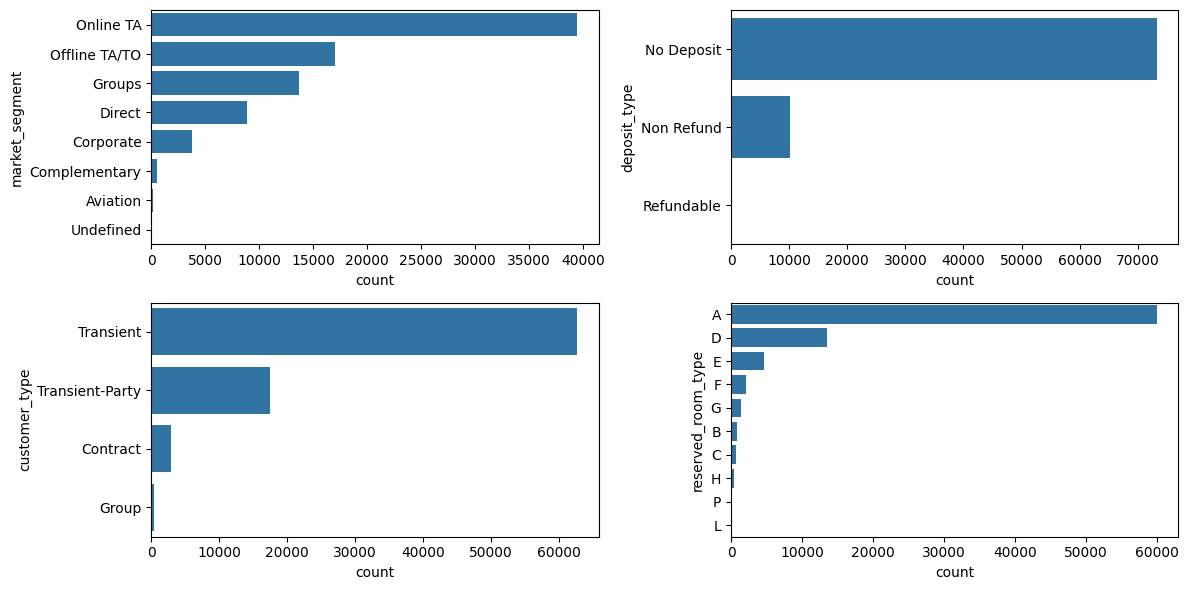

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

for i, j in zip([cols for cols in categorical_cols if cols != 'country'], axes.flatten()):
    sns.countplot(data=df, y= i, ax= j, order=df[i].value_counts().index)


plt.tight_layout()

plt.show()

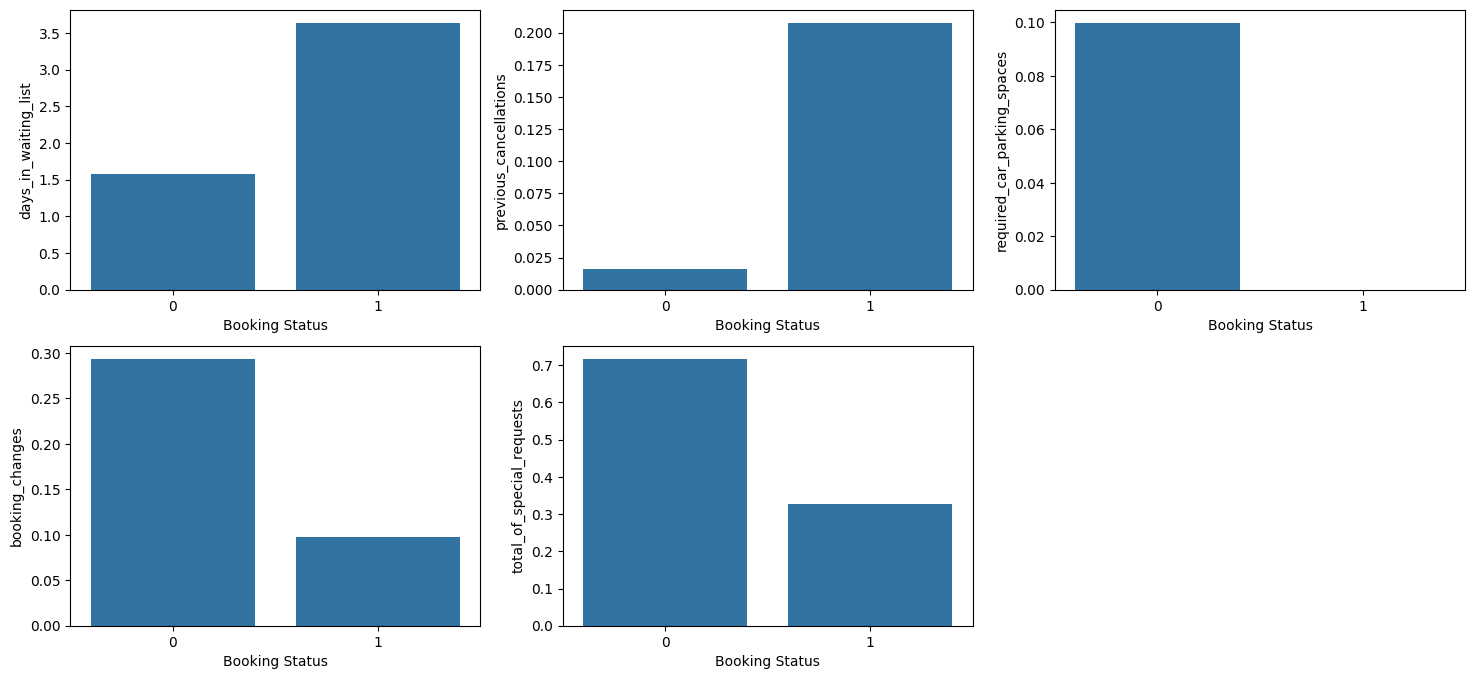

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

for i, j in zip(numerical_cols, axes.flatten()):
    graph = sns.barplot(data=df, x= 'is_canceled', y= i , ax= j, ci=0)
    graph.set_xlabel('Booking Status')

plt.gca().axis('off')

plt.show()

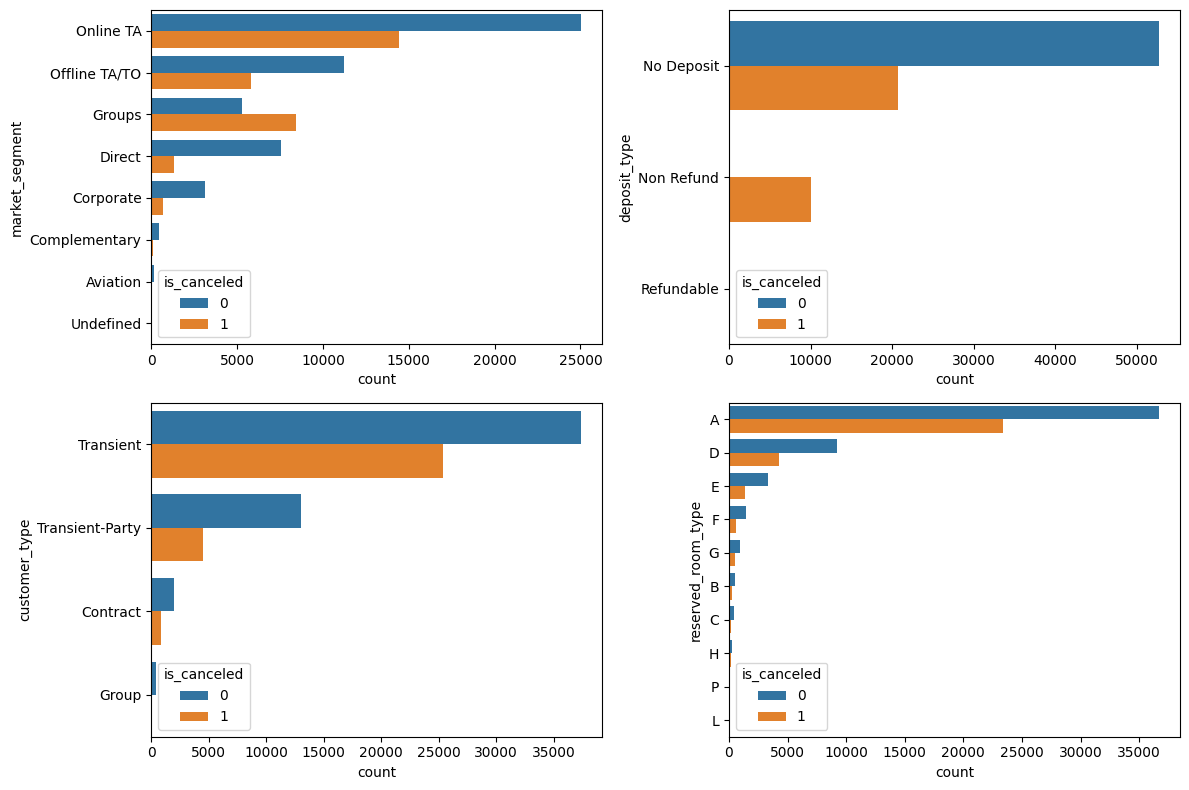

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, j in zip([cols for cols in categorical_cols if cols != 'country'], axes.flatten()):
    sns.countplot(data=df, y= i, ax= j, hue='is_canceled', order=df[i].value_counts().index)

plt.tight_layout()

plt.show()

In [41]:
top10_country = df['country'].value_counts().to_frame().reset_index().head(10)
top10_country = top10_country.rename(columns={'country':'Number of Bookings', 'index': 'Country'})
sns.barplot(data = top10_country, x='Country', y='Number of Bookings')

ValueError: Could not interpret value `Country` for `x`. An entry with this name does not appear in `data`.

<AxesSubplot:xlabel='count', ylabel='country'>

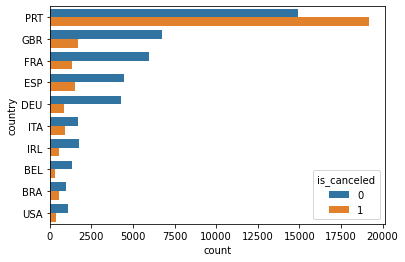

In [33]:
df_country = df[df['country'].isin(top10_country['Country'])]

sns.countplot(data=df_country, y= 'country', hue='is_canceled', order= df_country['country'].value_counts().index)

### 3.. Data Preprocessing - Feature Engineering

This code performs analysis and preprocessing on the 'country' column of the DataFrame df with the following steps:

1. **Calculating Missing Values**: calculates the number of missing values in the column `'country'` with `df['country'].isnull().sum()`. This provides an overview of how much data lacks country information.

2. **Calculate Unique Values and distribution**: Next, the code calculates the number of unique values in the `'country'`column using `df['country'].nunique()`, as well as the distribution of values in that column with `df['country'].value_counts()`. IThis shows the diversity of country data and how frequently each country appears in the dataset.

3. **Percentage of Data from Portugal**: The code calculates the percentage of data originating from Portugal using `df['country'].value_counts(normalize=True)['PRT'] * 100`. This gives the proportion of data from Portugal in percentage form.

4. **Feature Engineering**: To simplify the data and handle missing values, the code fills missing values in the  `'country'` column with `'Other'` using `df['country'].fillna('Other')`. Then, the `'country'` column is transformed into three categories: `'Portugal'` for the country Portugal, `'Non Portugal'` or countries other than Portugal and  `'Other'` for previously missing or non-conforming data.

5. **Displaying the Results of Changes**: The code displays the number of missing values, the number of unique countries, the distribution of countries, the percentage of data from Portugal, and the distribution of countries after the new grouping. This provides insights into the changes made and the final distribution of the data after preprocessing.

These steps are important to ensure that the data used in analysis or modeling is not only clean and well-structured but also relevant and easy to understand.

In [34]:
missing_country = df['country'].isnull().sum()

# Calculate total of unique values in column 'country'
unique_country_count = df['country'].nunique()

# calculate distribution value in column 'country'
country_distribution = df['country'].value_counts()

# calculate percentage of data from Portugal
portugal_percentage = (df['country'].value_counts(normalize=True)['PRT']) * 100

# Feature engineering to categorize countries to 'Portugal', 'Non Portugal' and 'other'
df['country'] = df['country'].fillna('Other')
df['country'] = np.where(df['country'] == 'PRT', 'Portugal', 'Non Portugal')

# Display the difference
country_counts = df['country'].value_counts()

# Output
print(f"Missing values in 'country': {missing_country}")
print(f"Unique countries count: {unique_country_count}")
print(f"Country distribution: \n{country_distribution}")
print(f"Percentage of data from Portugal: {portugal_percentage:.2f}%")
print(f"Updated country distribution: \n{country_counts}")


Missing values in 'country': 351
Unique countries count: 162
Country distribution: 
PRT    34097
GBR     8495
FRA     7307
ESP     5996
DEU     5116
       ...  
ZMB        1
LCA        1
SYC        1
GLP        1
AIA        1
Name: country, Length: 162, dtype: int64
Percentage of data from Portugal: 40.97%
Updated country distribution: 
Non Portugal    49476
Portugal        34097
Name: country, dtype: int64


In [35]:
df.isna().sum()

country                        0
market_segment                 0
previous_cancellations         0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
reserved_room_type             0
required_car_parking_spaces    0
total_of_special_requests      0
is_canceled                    0
dtype: int64

### 4. Encoding

In this process, categorical and ordinal columns from the DataFrame `df` are encoded. First, categorical columns such as 'country', 'market_segment', 'deposit_type', and 'customer_type' are encoded using One-Hot Encoding. With OneHotEncoder, the involved features are transformed into binary representations, avoiding the dummy variable trap with `drop='first'`, and the results are stored in the DataFrame `data_ohe_df`. Then, the ordinal column 'reserved_room_type' is encoded using OrdinalEncoder, which converts categories with a fixed order into numerical values according to their order. The results of the ordinal encoding are stored in the DataFrame `data_ord_df`.

The encoded results from both methods are then combined with the original DataFrame after removing the columns that have been encoded. The final DataFrame, `df_encoded`, includes all the encoded features and is ready for further analysis or modeling. This process ensures that the data is in a format that can be used by machine learning algorithms, enhancing the model's ability to capture information from categorical and ordinal features more effectively.

In [25]:
# Encoding categorical column using One-Hot Encoding
kolom_kategorikal = ['country', 'market_segment', 'deposit_type', 'customer_type']
encoder_ohe = OneHotEncoder(drop='first', sparse_output=False)
data_ohe = encoder_ohe.fit_transform(df[kolom_kategorikal])
data_ohe_df = pd.DataFrame(data_ohe, columns=encoder_ohe.get_feature_names_out(kolom_kategorikal))

# Encoding ordinal columns 
kolom_ordinal = 'reserved_room_type'
ordinal_urutan = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'P']
encoder_ord = OrdinalEncoder(categories=[ordinal_urutan])
data_ord = encoder_ord.fit_transform(df[[kolom_ordinal]])
data_ord_df = pd.DataFrame(data_ord, columns=['reserved_room_type_ord'])

# Combining encoding results with original DataFrame
df_encoded = pd.concat([df.drop(columns=kolom_kategorikal + [kolom_ordinal]), data_ohe_df, data_ord_df], axis=1)

# Display final result
print(f"Kolom-kolom DataFrame setelah encoding: \n{df_encoded.columns}")

Kolom-kolom DataFrame setelah encoding: 
Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'total_of_special_requests',
       'is_canceled', 'country_AGO', 'country_AIA', 'country_ALB',
       'country_AND',
       ...
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Undefined',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'reserved_room_type_ord'],
      dtype='object', length=181)


In [37]:
df_encoded

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled,country_Portugal,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reserved_room_type_ord
0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,1,0,0,2,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,2,0,0,2,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83568,0,0,0,0,3,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83569,0,0,0,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
83570,0,1,0,0,3,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
83571,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
X = df_encoded.drop(['is_canceled'], axis=1)
y = df_encoded['is_canceled']

# Divide data to data training and data test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
model = RandomForestClassifier()  # Ganti dengan model yang sesuai
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy:.2f}")

# If needed, display featured that will be used
print(f"Columns after encoding: \n{X.columns}")


Akurasi model: 0.81
Columns after encoding: 
Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'total_of_special_requests',
       'country_AGO', 'country_AIA', 'country_ALB', 'country_AND',
       'country_ARE',
       ...
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Undefined',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'reserved_room_type_ord'],
      dtype='object', length=180)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y, test_size=0.3)
X

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,country_Portugal,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reserved_room_type_ord
0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,1,0,0,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,2,0,0,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83568,0,0,0,0,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83569,0,0,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
83570,0,1,0,0,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
83571,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Data Evaluation Model

**Introduction of each model used**

1. Logistic Regression

    Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Logistic regression transforms its output using the logistic sigmoid function to return a probability value.

    Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.

    <img src="https://miro.medium.com/max/828/1*dm6ZaX5fuSmuVvM4Ds-vcg.webp">

    Source: Practice Session Documentation (.ipynb)

2. K Nearest Neighbours

    The K-Nearest Neighbours (KNN) algorithm is one of the simplest supervised machine learning algorithms that is used to solve both classification and regression problems. KNN is also known as an instance-based model or a lazy learner because it doesn’t construct an internal model. It’s a highly used, simple yet efficient example of a non-parametric, lazy learner classification algorithm.

    For **classification** problems, it will find the k nearest neighbors and predict the class by the majority vote of the nearest neighbors.

    K represents the number of nearest neighbours. When K = 1, the algorithm is called the nearest neighbour algorithm. This is the simplest scenario where given an unlabelled position X, the algorithm can predict its label by finding the closest labelled point to X and assigning that as the label.

    <img src="https://miro.medium.com/max/640/1*OSGTvzQuWjG56g-0dVqgeA.webp">

    Source: Practice Session Documentation (.ipynb)
  
3. Decision Tree

    A decision tree is a tree where each node represents a feature(attribute), each link(branch) represents a decision(rule) and each leaf represents an outcome(categorical or continues value).

    The whole idea is to create a tree like this for the entire data and process a single outcome at every leaf(or minimize the error in every leaf).

    <img src="https://lh4.googleusercontent.com/v9UQUwaQTAXVH90b-Ugyw2_61_uErfYvTBtG-RNRNB_eHUFq9AmAN_2IOdfOETnbXImnQVN-wPC7_YzDgf7urCeyhyx5UZmuSwV8BVsV8VnHxl1KtgpuxDifJ4pLE23ooYXLlnc">

    Source: Practice Session Documentation (.ipynb)

4. Random Forest

    Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

    <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*VHDtVaDPNepRglIAv72BFg.jpeg">

    Source: https://towardsdatascience.com/understanding-random-forest-58381e0602d2
    
5. AdaBoost

    AdaBoost is one of the first boosting algorithms to be adapted in solving practices. Adaboost helps you combine multiple “weak classifiers” into a single “strong classifier”. Here are some (fun) facts about Adaboost!
    - The weak learners in AdaBoost are decision trees with a single split, called decision stumps.
    - AdaBoost works by putting more weight on difficult to classify instances and less on those already handled well.
    - AdaBoost algorithms can be used for both classification and regression problem.

    <img src="https://miro.medium.com/v2/format:webp/1*m2UHkzWWJ0kfQyL5tBFNsQ.png">

    Source: https://towardsdatascience.com/understanding-adaboost-2f94f22d5bfe

6. Gradient Boosting (GBM)

    Gradient boosting is one of the variants of ensemble methods where you create multiple weak models and combine them to get better performance as a whole.

    <img src="https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-3-030-34482-5_25/MediaObjects/482246_1_En_25_Fig2_HTML.png">

    Source: https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-1-regression-2520a34a502

7. Light GBM

    LightGBM is a gradient boosting framework based on decision trees to increases the efficiency of the model and reduces memory usage.
    It uses two novel techniques: Gradient-based One Side Sampling and Exclusive Feature Bundling (EFB) which fulfills the limitations of histogram-based algorithm that is primarily used in all GBDT (Gradient Boosting Decision Tree) frameworks. The two techniques of GOSS and EFB described below form the characteristics of LightGBM Algorithm. They comprise together to make the model work efficiently and provide it a cutting edge over other GBDT frameworks.

    Source:  https://www.geeksforgeeks.org/lightgbm-light-gradient-boosting-machine/

8. XGBoost

    XGBoost is an extension to gradient boosted decision trees (GBM) and specially designed to improve speed and performance.
    
    Source: https://www.mygreatlearning.com/blog/xgboost-algorithm/

### 1. Model 

In [27]:
# Define model
logreg = LogisticRegression(random_state=0, solver='liblinear')
knn = KNeighborsClassifier(n_neighbors=5)
dtree = DecisionTreeClassifier(random_state=0, max_depth=5)
rf = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(random_state=0)
gbm = GradientBoostingClassifier(random_state=0)
lgbm = lgb.LGBMClassifier()
xgboost = XGBClassifier(random_state=0)

# List of model we will evaluate
models = [
    ('Logistic Regression', logreg), 
    ('KNN', knn),
    ('Decision Tree', dtree),
    ('Random Forest', rf), 
    ('AdaBoost', ada),
    ('Gradient Boosting', gbm),
    ('Light GBM', lgbm),
    ('Xgboost', xgboost)
]


# Train and evaluate each model
for name, model in models:
    print(f"Evaluating {name}...")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Prediction of test data
    y_pred = model.predict(X_test)
    
    # Calculate metric evaluation
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else "N/A"
    
    # Display evaluation result
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Classification Report:\n{class_report}")
    print("="*50)


Evaluating Logistic Regression...
Accuracy: 0.7869
ROC AUC: 0.8648
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.85     10601
           1       0.80      0.56      0.66      6114

    accuracy                           0.79     16715
   macro avg       0.79      0.74      0.75     16715
weighted avg       0.79      0.79      0.78     16715

Evaluating KNN...
Accuracy: 0.7835
ROC AUC: 0.8515
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83     10601
           1       0.70      0.71      0.71      6114

    accuracy                           0.78     16715
   macro avg       0.77      0.77      0.77     16715
weighted avg       0.78      0.78      0.78     16715

Evaluating Decision Tree...
Accuracy: 0.7953
ROC AUC: 0.8593
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85

This data model evaluation performs several steps to assess the performance of various classification models on the given dataset. Here is an explanation of each part of the code:

Model definition: 

Define several classification models to be evaluated, including:
1. Logistic Regression: A logistic regression model for binary classification.
2. K-Nearest Neighbors (KNN): A distance-based model that predicts labels based on the nearest neighbors' labels.
3. Decision Tree: A decision tree model that splits data based on features to make decisions.
4. Random Forest: An ensemble of decision trees that makes predictions based on majority voting.
5. AdaBoost: A boosting model that combines weak models (e.g., small decision trees) to form a stronger model.
6. Gradient Boosting: A boosting model that gradually combines weak models, focusing on previous prediction errors.
7. LightGBM: A boosting model designed for speed and efficiency on large datasets.
8. XGBoost: A boosting model designed for high performance and flexibility on various types of data.

List of models to be evaluated: 
All defined models are included in a list models that contains pairs of model names and the model objects themselves.

Model Training and Evaluation:

Model training:
Each model is trained on the training data (X_train, y_train) using model.fit(X_train, y_train).
Melakukan Prediksi: Model yang telah dilatih digunakan untuk memprediksi label pada data uji (X_test) dengan model.predict(X_test).

Evaluation Metrics Calculation: 
Accuracy: Measures the proportion of correct predictions compared to the total predictions. It is calculated with accuracy_score(y_test, y_pred).
Classification Report: Memberikan detail metrik evaluasi seperti precision, recall, dan F1-score untuk setiap kelas. Dihasilkan dengan classification_report(y_test, y_pred).
ROC AUC: Mengukur seberapa baik model memisahkan kelas positif dan negatif. ROC AUC dihitung dengan roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) jika model mendukung probabilitas prediksi (predict_proba). Jika tidak, ROC AUC dinyatakan sebagai "N/A".
Menampilkan Hasil Evaluasi:

Hasil dari metrik evaluasi (Accuracy, ROC AUC, dan Classification Report) ditampilkan untuk setiap model. Hasil ini memberikan gambaran tentang kinerja model dalam hal akurasi, kemampuan memisahkan kelas, dan detail kinerja klasifikasi pada data uji.
Dengan langkah-langkah ini, Anda dapat membandingkan kinerja berbagai model klasifikasi dan memilih model yang paling sesuai untuk kasus prediksi pembatalan reservasi yang sedang dianalisis.

### Benchmark Model

In [41]:

def cross_val(X_train, y_train, models, metric):
    results = []

    for name, model in models:
        # Siapkan pipeline dengan scaler untuk KNN
        pipe_model = Pipeline([
            ('scaler', RobustScaler()) if name == 'KNN' else ('dummy', 'passthrough'),
            ('model', model)
        ])
        
        skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
        model_cv = cross_validate(pipe_model, X_train, y_train, cv=skfold, scoring=metric)

        # Menyimpan hasil evaluasi
        results.append({
            'model': name,
            f'mean {metric}': np.mean(model_cv['test_score']),
            'std': np.std(model_cv['test_score']),
            'fit time': np.mean(model_cv['fit_time']),
            'score time': np.mean(model_cv['score_time']),
            f'{metric}': np.round(model_cv['test_score'], 3)
        })
    
    result_df = pd.DataFrame(results)
    return result_df.sort_values(f'mean {metric}', ascending=False)

# Model and metrics
models = [
    ('Logistic Regression', LogisticRegression(random_state=0, solver='liblinear')),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Decision Tree', DecisionTreeClassifier(random_state=0, max_depth=5)),
    ('Random Forest', RandomForestClassifier(random_state=0)),
    ('AdaBoost', AdaBoostClassifier(random_state=0)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=0)),
    ('Light GBM', lgb.LGBMClassifier()),
    ('Xgboost', XGBClassifier(random_state=0))
]

# Metric definition
scoring_f2 = make_scorer(fbeta_score, beta=2)

# Benchmark
X_train = df_encoded.drop(['is_canceled'], axis=1)
y_train = df_encoded['is_canceled']
benchmark_results = cross_val(X_train, y_train, models, scoring_f2)

# Display benchmark result
print('Train Dataset')
print(benchmark_results)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 24622, number of negative: 42236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 166
[LightGBM] [Info] Number of data points in the train set: 66858, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368273 -> initscore=-0.539633
[LightGBM] [Info] Start training from score -0.539633
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 24622, number of negative: 42236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

This script performs cross-validation on various classification models to evaluate their performance using the F2 Score metric. The cross_val function trains each model on the training dataset, applies feature scaling for KNN, and calculates evaluation metrics as well as training and scoring times. The results are stored in a DataFrame that is sorted by the average of the metric values, providing a comprehensive picture of the performance of each model. The models tested include Logistic Regression, KNN, Decision Tree, Random Forest, AdaBoost, Gradient Boosting, LightGBM, and XGBoost.








In [42]:
import time
from sklearn.metrics import fbeta_score, roc_auc_score, precision_score, recall_score

# List to save the result
list_model = []
list_f2 = []
list_roc_auc = []
list_precision = []
list_recall = []
fit_time = []
score_time = []

# Loop for every model
for name, model in models:
    # Pipeline with scaler for KNN
    if name == 'KNN':
        pipe_model = Pipeline([
            ('scaler', RobustScaler()),
            ('model', model)
        ])
    else:
        pipe_model = Pipeline([
            ('model', model)
        ])
    
    # Train model
    start = time.time()
    pipe_model.fit(X_train, y_train)
    stop = time.time()
    fit_time.append(round(stop - start, 3))

    # Prediction and evaluation
    start = time.time()
    y_pred = pipe_model.predict(X_test)
    stop = time.time()
    score_time.append(round(stop - start, 3))

    # Save evaluation result
    list_model.append(name)
    list_f2.append(round(fbeta_score(y_test, y_pred, beta=2), 3))
    list_roc_auc.append(round(roc_auc_score(y_test, y_pred), 3))
    list_precision.append(round(precision_score(y_test, y_pred), 3))
    list_recall.append(round(recall_score(y_test, y_pred), 3))

# Display test result
print('Test Dataset')
results_df = pd.DataFrame({
    'model': list_model,
    'f2 score': list_f2,
    'auc roc': list_roc_auc,
    'precision': list_precision,
    'recall': list_recall,
    'fit time': fit_time,
    'score time': score_time
}).sort_values('f2 score', ascending=False)

print(results_df)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 30778, number of negative: 52795
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 169
[LightGBM] [Info] Number of data points in the train set: 83573, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368277 -> initscore=-0.539616
[LightGBM] [Info] Start training from score -0.539616
Test Dataset
                 model  f2 score  auc roc  precision  recall  fit time  \
3        Random Forest     0.725    0.794      0.765   0.716     9.283   
7              Xgboost     0.712    0.788      0.768   0.699     0.524   
6            Light GBM     0.708    0.787      0.771   0.694     0.581   
1                  KNN     0.705    0.750      0.658  

This new program evaluates various classification models by calculating several performance metrics, namely F2 Score, ROC AUC, precision, and recall, as well as recording training and prediction times. Each model is trained on the training dataset and tested on the test dataset. Training time and prediction time are recorded to measure the efficiency of the model. Evaluation metrics are calculated using test data to assess how good the model is in terms of sensitivity (recall), specificity (precision), ability to differentiate classes (ROC AUC), and balance between precision and recall (F2 Score). The results are presented in the form of a DataFrame sorted by F2 Score to facilitate comparison of model performance.

Unlike previous programs that used cross-validation to evaluate models by dividing data into multiple folds, this new program only trains and tests the model on a single test data set. Cross-validation provides a more robust picture of model performance by considering variations in training and testing data, whereas this new method provides more direct evaluation results but may not cover all variations that can occur in the data. By using cross-validation, you can reduce the possibility of overfitting and get a more reliable evaluation, whereas this approach may be faster but less thorough in assessing overall model performance.

In [43]:
print("Kolom dalam X_train:")
print(X_train.columns)

print("Kolom dalam X_test:")
print(X_test.columns)


Kolom dalam X_train:
Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'total_of_special_requests',
       'country_Portugal', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Undefined',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'reserved_room_type_ord'],
      dtype='object')
Kolom dalam X_test:
Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'total_of_special_requests',
       'country_Portugal', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'm

In [44]:
# List of appropriate features
categorical_features = [
    'country_Portugal', 
    'market_segment_Complementary', 
    'market_segment_Corporate', 
    'market_segment_Direct', 
    'market_segment_Groups', 
    'market_segment_Offline TA/TO', 
    'market_segment_Online TA', 
    'market_segment_Undefined', 
    'deposit_type_Non Refund', 
    'deposit_type_Refundable', 
    'customer_type_Group', 
    'customer_type_Transient', 
    'customer_type_Transient-Party', 
    'reserved_room_type_ord'
]

numeric_features = [
    'previous_cancellations', 
    'booking_changes', 
    'days_in_waiting_list', 
    'required_car_parking_spaces', 
    'total_of_special_requests'
]

# Create transformers for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)


In [45]:
import pandas as pd
import time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import fbeta_score, roc_auc_score, precision_score, recall_score

# List to save results
list_model = []
list_f2 = []
list_roc_auc = []
list_precision = []
list_recall = []
fit_time = []
score_time = []

# Loop for every model
for name, model in models:
    # Pipeline with scaler for KNN
    if name == 'KNN':
        pipe_model = Pipeline([
            ('scaler', RobustScaler()),
            ('model', model)
        ])
    else:
        pipe_model = Pipeline([
            ('model', model)
        ])
    
    # Train model
    start = time.time()
    pipe_model.fit(X_train, y_train)
    stop = time.time()
    fit_time.append(round(stop - start, 3))

    # Prediction and evaluation
    start = time.time()
    y_pred = pipe_model.predict(X_test)
    stop = time.time()
    score_time.append(round(stop - start, 3))

    # Save evaluation result
    list_model.append(name)
    list_f2.append(round(fbeta_score(y_test, y_pred, beta=2), 3))
    list_roc_auc.append(round(roc_auc_score(y_test, y_pred), 3))
    list_precision.append(round(precision_score(y_test, y_pred), 3))
    list_recall.append(round(recall_score(y_test, y_pred), 3))

# Display test result
print('Test Dataset')
pd.options.display.float_format = '{:.3f}'.format
results_df = pd.DataFrame({
    'model': list_model,
    'f2 score': list_f2,
    'auc roc': list_roc_auc,
    'precision': list_precision,
    'recall': list_recall,
    'fit time': fit_time,
    'score time': score_time
}).sort_values('f2 score', ascending=False)

print(results_df)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 30778, number of negative: 52795
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 169
[LightGBM] [Info] Number of data points in the train set: 83573, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368277 -> initscore=-0.539616
[LightGBM] [Info] Start training from score -0.539616
Test Dataset
                 model  f2 score  auc roc  precision  recall  fit time  \
3        Random Forest     0.725    0.794      0.765   0.716    13.298   
7              Xgboost     0.712    0.788      0.768   0.699     1.186   
6            Light GBM     0.708    0.787      0.771   0.694     0.931   
1                  KNN     0.705    0.750      0.658  

This program is the same as the previous one in terms of goals: evaluating various classification models using F2 Score, ROC AUC, precision, and recall metrics, as well as recording training and prediction times. The difference lies in setting the result display format using pd.options.display.float_format, which ensures that all values ​​in the DataFrame are displayed in three-place decimal format. This improves the readability of results by avoiding the display of excessively long decimal numbers, making evaluation results more consistent and easier to read when printed to the screen.

Overall, this program provides direct evaluation results for each model and presents them in a DataFrame ordered by F2 Score, just like the previous program. Using pd.options.display.float_format only adds visual convenience without changing the logic or results of the model evaluation itself.








In [46]:
pipe_model = Pipeline([
                ('algo', rf)
            ])
pipe_model.fit(X_train, y_train)
y_pred = pipe_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86     15839
           1       0.76      0.72      0.74      9233

    accuracy                           0.81     25072
   macro avg       0.80      0.79      0.80     25072
weighted avg       0.81      0.81      0.81     25072



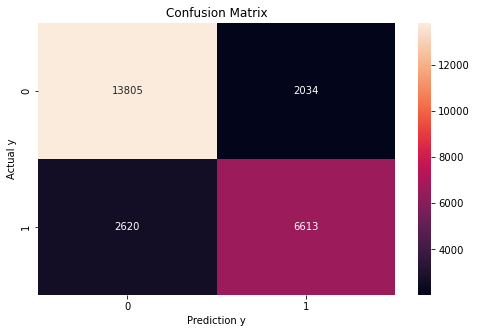

In [47]:
plt.figure(figsize=(8,5))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='0.0f', cmap='rocket')
plt.xlabel('Prediction y')
plt.ylabel('Actual y')
plt.title('Confusion Matrix')

plt.show()

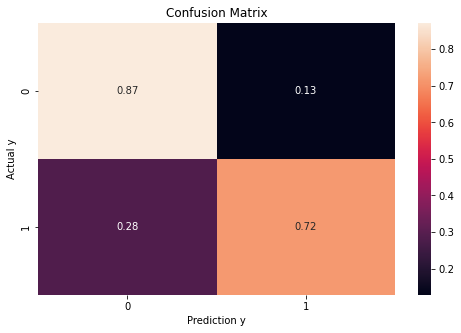

In [48]:
plt.figure(figsize=(8,5))
cf_matrix_norm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cf_matrix_norm, annot=True, fmt='0.2f', cmap='rocket')
plt.xlabel('Prediction y')
plt.ylabel('Actual y')
plt.title('Confusion Matrix')

plt.show()

In [49]:
pipe_model = Pipeline([
                ('algo', lgbm)
            ])
pipe_model.fit(X_train, y_train)
y_pred = pipe_model.predict(X_test)
print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 30778, number of negative: 52795
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 169
[LightGBM] [Info] Number of data points in the train set: 83573, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368277 -> initscore=-0.539616
[LightGBM] [Info] Start training from score -0.539616
              precision    recall  f1-score   support

           0       0.83      0.88      0.85     15839
           1       0.77      0.69      0.73      9233

    accuracy                           0.81     25072
   macro avg       0.80      0.79      0.79     25072
weighted avg       0.81      0.81      0.81     25072



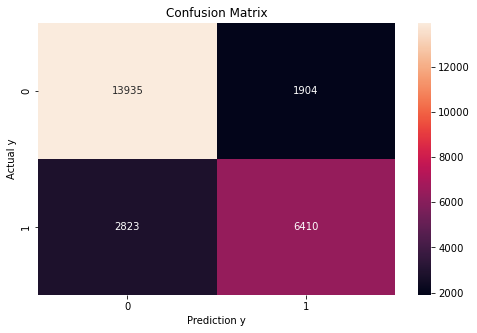

In [50]:
plt.figure(figsize=(8,5))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='0.0f', cmap='rocket')
plt.xlabel('Prediction y')
plt.ylabel('Actual y')
plt.title('Confusion Matrix')

plt.show()

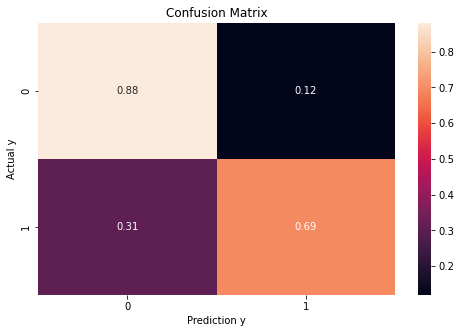

In [51]:
plt.figure(figsize=(8,5))
cf_matrix_norm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cf_matrix_norm, annot=True, fmt='0.2f', cmap='rocket')
plt.xlabel('Prediction y')
plt.ylabel('Actual y')
plt.title('Confusion Matrix')

plt.show()

In [52]:
pipe_model = Pipeline([
                ('algo', gbm)
            ])
pipe_model.fit(X_train, y_train)
y_pred = pipe_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85     15839
           1       0.78      0.66      0.72      9233

    accuracy                           0.81     25072
   macro avg       0.80      0.78      0.78     25072
weighted avg       0.81      0.81      0.80     25072



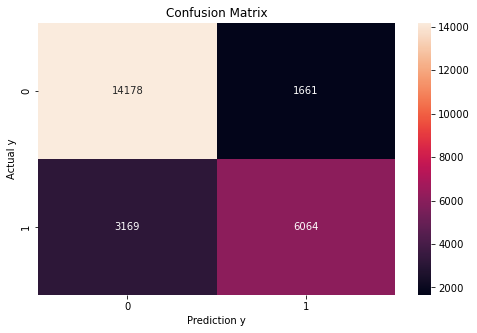

In [53]:
plt.figure(figsize=(8,5))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='0.0f', cmap='rocket')
plt.xlabel('Prediction y')
plt.ylabel('Actual y')
plt.title('Confusion Matrix')

plt.show()

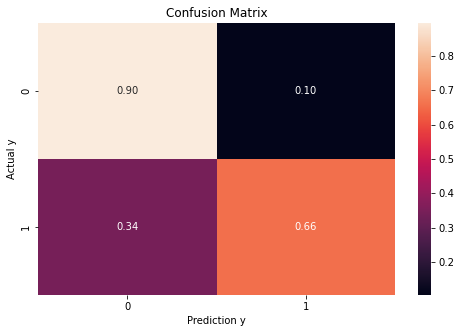

In [54]:
plt.figure(figsize=(8,5))
cf_matrix_norm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cf_matrix_norm, annot=True, fmt='0.2f', cmap='rocket')
plt.xlabel('Prediction y')
plt.ylabel('Actual y')
plt.title('Confusion Matrix')

plt.show()

### 3. Sampling

In [55]:
from imblearn.over_sampling import RandomOverSampler

def cross_val(X_train, y_train, models, metric):
    list_name = []
    list_mean = []
    list_std = []
    list_fit_time = []
    list_score_time = []
    cross_val = []

    for name, model in models:
        if name == 'KNN':
            pipe_model = Pipeline([
                ('resampling', RandomOverSampler(random_state=0)),
                ('scaler', RobustScaler()),
                ('algo', model)
            ])
        else:
            pipe_model = Pipeline([
                ('resampling', RandomOverSampler(random_state=0)),
                ('algo', model)
            ])

        skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

        model_cv = cross_validate(
            estimator=pipe_model,
            X=X_train,
            y=y_train,
            cv=skfold,
            scoring=make_scorer(metric)
        )

        metric_name = metric.__name__ if callable(metric) else metric
        
        list_name.append(name)
        list_fit_time.append(round(model_cv['fit_time'].mean(), 3))
        list_score_time.append(round(model_cv['score_time'].mean(), 3))
        list_mean.append(round(model_cv['test_score'].mean(), 3))
        list_std.append(round(model_cv['test_score'].std(), 3))
        cross_val.append(np.round_(model_cv['test_score'], 3))

    result = pd.DataFrame({
        'model': list_name,
        f'mean {metric_name}': list_mean,
        'std': list_std,
        'fit time': list_fit_time,
        'score time': list_score_time,
        f'{metric_name}': cross_val
    })

    return result.sort_values(f'mean {metric_name}', ascending=False)


This program performs cross-validation to evaluate classification models, similar to previous programs, but with the addition of oversampling techniques and modifications in the collection and reporting of results. Here are the details of this script:

Oversampling: This script adds a RandomOverSampler step from imblearn to handle class imbalance in the dataset. Oversampling is applied in the pipeline before scaling for models such as KNN, which can be sensitive to class imbalance. It aims to improve the performance of the model by providing more examples from minority classes.

Cross-Validation: Cross-validation was performed using StratifiedKFold with 5 folds, as before, but this time with oversampling applied to each fold. The evaluation results are stored in a DataFrame that includes the mean and standard deviation of the metric scores, training time, and scoring time.

Results Collection and Reporting: In addition to storing evaluation results in list form, the metric names used in reporting are determined dynamically from the metric function. The resulting DataFrames are sorted by the average value of the metric, providing insight into model performance after applying oversampling.

Overall, the main difference from previous programs is the integration of oversampling and improvements in results collection as well as adjustments to results reporting to provide more detailed information about model performance in class imbalance situations.

In [56]:
from imblearn.pipeline import Pipeline as imPipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

# Definisikan model
logreg = LogisticRegression(random_state=0, solver='liblinear')
knn = KNeighborsClassifier(n_neighbors=5)
dtree = DecisionTreeClassifier(random_state=0, max_depth=5)
rf = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(random_state=0)
gbm = GradientBoostingClassifier(random_state=0)
lgbm = lgb.LGBMClassifier()
xgboost = XGBClassifier(random_state=0)

# List of models to evaluate
models = [
    ('Logistic Regression', logreg), 
    ('KNN', knn),
    ('Decision Tree', dtree),
    ('Random Forest', rf), 
    ('AdaBoost', ada),
    ('Gradient Boosting', gbm),
    ('Light GBM', lgbm),
    ('Xgboost', xgboost)
]

# List of numeric and categorical features, if any
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Train and evaluate every model
list_model = []
list_f2 = []
list_roc_auc = []
list_precision = []
list_recall = []
fit_time = []
score_time = []

for name, model in models:
    print(f"Evaluating {name}...")
    
    # Create pipeline
    if name == 'KNN':
        pipe_model = imPipeline([
            ('resampling', RandomOverSampler(random_state=0)),
            ('preprocessing', ColumnTransformer([
                ('scaler', RobustScaler(), numerical_features)
            ], remainder='passthrough')),
            ('algo', model)
        ])
    else:
        pipe_model = imPipeline([
            ('resampling', RandomOverSampler(random_state=0)),
            ('preprocessing', ColumnTransformer([
                ('scaler', RobustScaler(), numerical_features)
            ], remainder='passthrough')),
            ('algo', model)
        ])
    
    # Train model
    start = time.time()
    pipe_model.fit(X_train, y_train)
    stop = time.time()
    fit_time.append(round(stop - start, 3))

    # Evaluate model
    start = time.time()
    y_pred = pipe_model.predict(X_test)
    stop = time.time()
    score_time.append(round(stop - start, 3))

    # Calculate evaluation metrics
    f2 = round(fbeta_score(y_test, y_pred, beta=2), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    
    # ROC AUC only if model has metode predict_proba
    if hasattr(pipe_model.named_steps['algo'], 'predict_proba'):
        roc_auc = round(roc_auc_score(y_test, pipe_model.predict_proba(X_test)[:, 1]), 3)
    else:
        roc_auc = "N/A"

    list_model.append(name)
    list_f2.append(f2)
    list_roc_auc.append(roc_auc)
    list_precision.append(precision)
    list_recall.append(recall)

# Display evaluation result
results_df = pd.DataFrame({
    'model': list_model,
    'f2 score': list_f2,
    'roc auc': list_roc_auc,
    'precision': list_precision,
    'recall': list_recall,
    'fit time': fit_time,
    'score time': score_time
}).sort_values('f2 score', ascending=False)

pd.options.display.float_format = '{:.3f}'.format
print(results_df)


Evaluating Logistic Regression...
Evaluating KNN...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating AdaBoost...
Evaluating Gradient Boosting...
Evaluating Light GBM...
[LightGBM] [Info] Number of positive: 52795, number of negative: 52795
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 173
[LightGBM] [Info] Number of data points in the train set: 105590, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Evaluating Xgboost...
                 model  f2 score  roc auc  precision  recall  fit time  \
3        Random Forest     0.765    0.895      0.713   0.779     6.792   
7              Xgboost     0.760    0.891      0.711   0.773     0.778   
6            Light GBM     0.759    0.891      0.710   0.772     0

This program is similar to the previous one but integrates several important changes, including the use of imPipeline from imblearn to handle oversampling and preprocessing, as well as grouping numeric features for scaling. Here are the differences:

Use of imPipeline and ColumnTransformer: This program uses imPipeline from imblearn, which supports resampling and preprocessing in pipelines. ColumnTransformer is used to apply RobustScaler only to numeric features, allowing separate processing for numeric and categorical features (although in this example, all features are processed with RobustScaler). It optimizes the pipeline by applying scaling only to numeric features and avoiding reprocessing of features that do not require scaling.

Model Filtering with predict_proba: This program also checks whether the model has a predict_proba method before calculating the ROC AUC, and marks the ROC AUC as "N/A" if the method is missing. This ensures that the ROC AUC metric is only calculated for models that can provide class probabilities, preventing errors if the model does not support the method.

Overall, these changes improve the flexibility and accuracy of model evaluation by ensuring that preprocessing is performed appropriately on numerical features and only computes relevant metrics for the models that support them.

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

def cross_val_f2(model, X, y):
    return cross_val_score(model, X, y, cv=5, scoring=make_scorer(fbeta_score, beta=2))

results = []

for name, model in models:
    print(f"Evaluating {name}...")

    # Create pipeline
    if name == 'KNN':
        pipe_model = imPipeline([
            ('resampling', RandomOverSampler(random_state=0)),
            ('preprocessing', ColumnTransformer([
                ('scaler', RobustScaler(), numerical_features)
            ], remainder='passthrough')),
            ('algo', model)
        ])
    else:
        pipe_model = imPipeline([
            ('resampling', RandomOverSampler(random_state=0)),
            ('preprocessing', ColumnTransformer([
                ('scaler', RobustScaler(), numerical_features)
            ], remainder='passthrough')),
            ('algo', model)
        ])

    # Train model
    start = time.time()
    pipe_model.fit(X_train, y_train)
    stop = time.time()
    fit_time = round(stop - start, 3)

    # Evaluate model
    start = time.time()
    y_pred = pipe_model.predict(X_test)
    stop = time.time()
    score_time = round(stop - start, 3)

    # Calculate metric evaluation
    f2_scores = cross_val_f2(pipe_model, X_train, y_train)
    mean_f2 = round(np.mean(f2_scores), 3)
    std_f2 = round(np.std(f2_scores), 3)
    f2 = round(fbeta_score(y_test, y_pred, beta=2), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    
    # ROC AUC only if model has metode predict_proba
    if hasattr(pipe_model.named_steps['algo'], 'predict_proba'):
        roc_auc = round(roc_auc_score(y_test, pipe_model.predict_proba(X_test)[:, 1]), 3)
    else:
        roc_auc = "N/A"

    results.append({
        'model': name,
        'mean f2': mean_f2,
        'std': std_f2,
        'fit time': fit_time,
        'score time': score_time,
        'f2': f2
    })

# Create DataFrame from evaluation result 
results_df = pd.DataFrame(results)

# Display evaluation result
pd.options.display.float_format = '{:.3f}'.format
print(results_df.sort_values('mean f2', ascending=False))


Evaluating Logistic Regression...
Evaluating KNN...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating AdaBoost...
Evaluating Gradient Boosting...
Evaluating Light GBM...
[LightGBM] [Info] Number of positive: 52795, number of negative: 52795
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 173
[LightGBM] [Info] Number of data points in the train set: 105590, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 42236, number of negative: 42236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [I

This program integrates several model evaluation techniques by using cross_val_score from sklearn to calculate the F2 score in cross-validation and implements a pipeline similar to the previous one. The following is an explanation and the main differences:

Use of cross_val_score for Cross-Validation: This program defines the function cross_val_f2 which calculates the F2 score using cross-validation with 5 folds. This provides an estimate of the model's performance on the training data as a whole, rather than just based on a single split of the training and test data. The cross-validation results (mean_f2 and std_f2) are added to the model evaluation results, providing a more stable picture of model performance across the training data.

Pipeline and Evaluation: The pipeline used (imPipeline from imblearn) and ColumnTransformer are set for all models, with resampling and scaling applied before the models are fit. Evaluation is carried out both with cross_val_f2 to obtain the mean and standard deviation of the F2 score, as well as by calculating other metrics such as F2 on the test data and ROC AUC if the predict_proba method is available. The evaluation results presented provide a comprehensive picture of the model performance during cross-validation and testing.

The program provides in-depth analysis of model performance by calculating more stable and comprehensive metrics from multiple models, thereby enabling more informative model selection.

In [58]:
import time
import numpy as np
import pandas as pd
import logging
from sklearn.metrics import fbeta_score, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

# Disable LightGBM warnings
logging.getLogger("lightgbm").setLevel(logging.ERROR)

models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('LightGBM', LGBMClassifier(verbose=-1))
]

# Resampling methods
resampling_methods = {
    'No Resampling': None,
    'Random Oversampling': RandomOverSampler(random_state=0),
    'SMOTE': SMOTE(random_state=0),
    'Random Undersampling': RandomUnderSampler(random_state=0)
}

# List to store results
results = []

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Evaluation loop
for resampling_name, resampling_method in resampling_methods.items():
    # If resampling is applied, resample the training set
    if resampling_method:
        X_resampled, y_resampled = resampling_method.fit_resample(X_train, y_train)
    else:
        X_resampled, y_resampled = X_train, y_train

    for name, model in models:
        # If KNN, scale features
        if name == 'KNN':
            pipe_model = Pipeline([
                ('scaler', RobustScaler()),  # Scaling for KNN
                ('model', model)
            ])
        else:
            pipe_model = model

        # Fit model
        start = time.time()
        pipe_model.fit(X_resampled, y_resampled)
        fit_time = time.time() - start

        # Predict
        start = time.time()
        y_pred = pipe_model.predict(X_test)
        score_time = time.time() - start

        # Calculate metrics
        f2 = round(fbeta_score(y_test, y_pred, beta=2), 3)
        roc_auc = round(roc_auc_score(y_test, y_pred), 3)
        precision = round(precision_score(y_test, y_pred), 3)
        recall = round(recall_score(y_test, y_pred), 3)

        # Append result
        results.append({
            'Resampling Method': resampling_name,
            'Model': name,
            'F2 Score': f2,
            'ROC AUC': roc_auc,
            'Precision': precision,
            'Recall': recall,
            'Fit Time': round(fit_time, 3),
            'Score Time': round(score_time, 3)
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Sort and display results
results_df_sorted = results_df.sort_values(['Resampling Method', 'F2 Score'], ascending=[True, False])

# Display the results in a formatted table
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print("All Results:")
    print(results_df_sorted)

# Show top 3 models by F2 Score for each resampling method
print("\nTop 3 Models by F2 Score for Each Resampling Method:")
for resampling_name in resampling_methods.keys():
    top_3_models = results_df_sorted[results_df_sorted['Resampling Method'] == resampling_name].nlargest(3, 'F2 Score')
    print(f"\nTop 3 models for {resampling_name}:")
    print(top_3_models[['Model', 'F2 Score']])

All Results:
       Resampling Method                Model  F2 Score  ROC AUC  Precision  \
2          No Resampling        Decision Tree     0.704    0.783      0.757   
3          No Resampling        Random Forest     0.699    0.781      0.760   
6          No Resampling             LightGBM     0.694    0.780      0.765   
5          No Resampling    Gradient Boosting     0.674    0.773      0.778   
1          No Resampling                  KNN     0.670    0.762      0.744   
4          No Resampling             AdaBoost     0.585    0.732      0.785   
0          No Resampling  Logistic Regression     0.568    0.725      0.790   
10   Random Oversampling        Random Forest     0.750    0.790      0.706   
9    Random Oversampling        Decision Tree     0.749    0.790      0.708   
13   Random Oversampling             LightGBM     0.748    0.791      0.710   
12   Random Oversampling    Gradient Boosting     0.746    0.787      0.701   
7    Random Oversampling  Logistic Regr

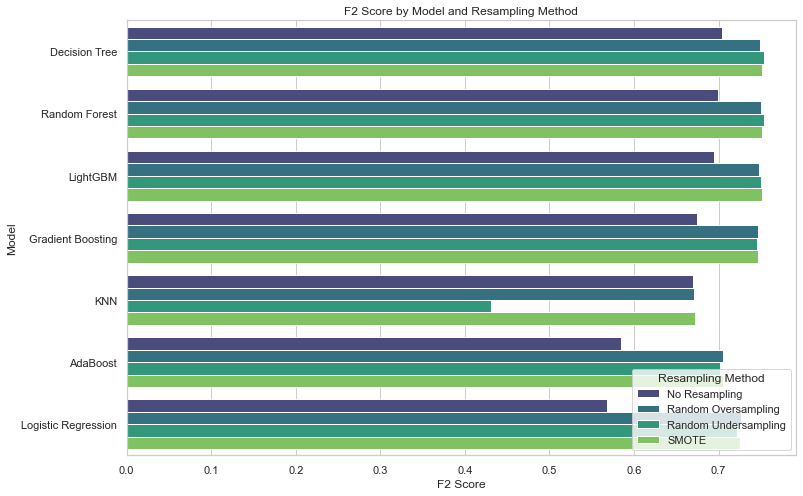

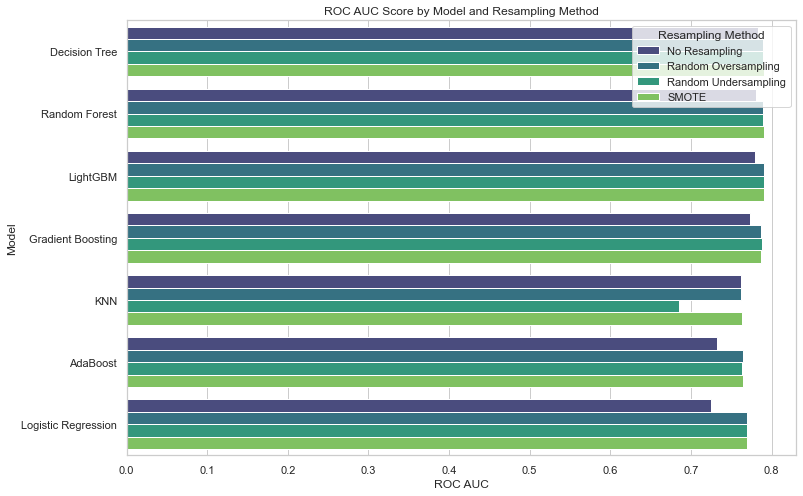

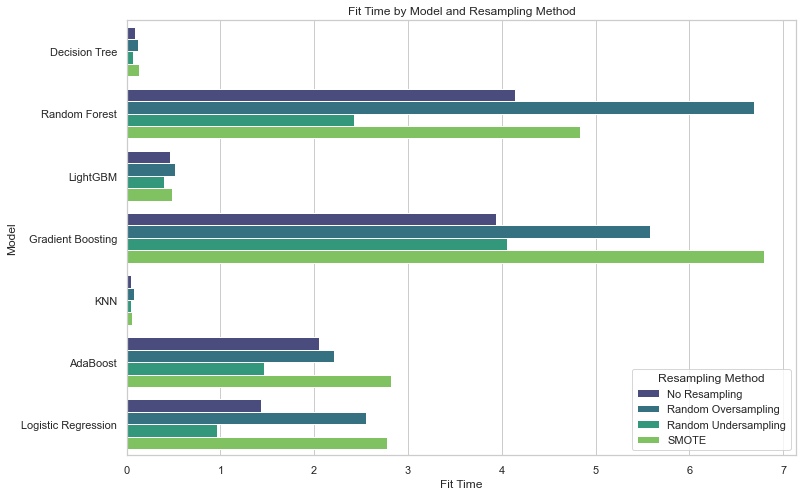

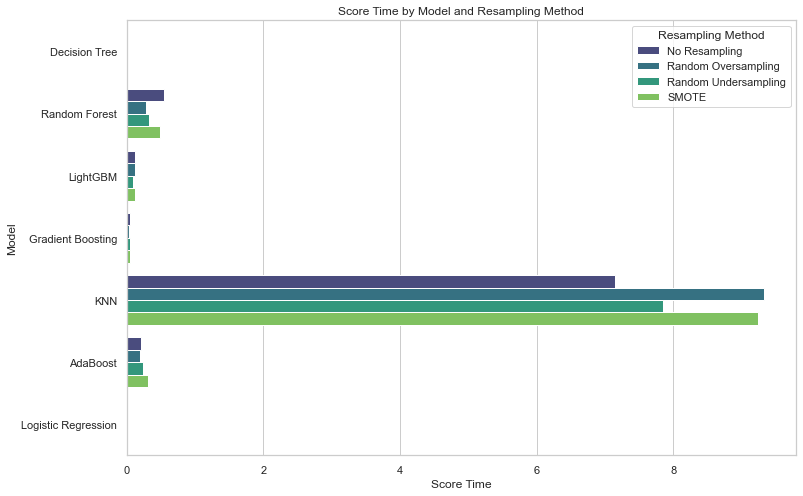

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Function to create bar plots
def plot_results(df, metric, title):
    plt.figure(figsize=(12, 8))
    sns.barplot(x=metric, y='Model', hue='Resampling Method', data=df, palette='viridis')
    plt.title(title)
    plt.xlabel(metric)
    plt.ylabel('Model')
    plt.legend(title='Resampling Method')
    plt.show()

# Plot F2 Score by Model and Resampling Method
plot_results(results_df_sorted, 'F2 Score', 'F2 Score by Model and Resampling Method')

# Plot ROC AUC Score by Model and Resampling Method
plot_results(results_df_sorted, 'ROC AUC', 'ROC AUC Score by Model and Resampling Method')

# Optionally, you can also visualize fit time and score time if needed
# Plot Fit Time by Model and Resampling Method
plot_results(results_df_sorted, 'Fit Time', 'Fit Time by Model and Resampling Method')

# Plot Score Time by Model and Resampling Method
plot_results(results_df_sorted, 'Score Time', 'Score Time by Model and Resampling Method')


This program evaluates various machine learning models using different resampling methods on a dataset and then displays the evaluation results. Here is a detailed explanation of each part of the program:

**Imports and Setup:**

- **Libraries:** Importing necessary libraries such as numpy, pandas, sklearn, imblearn, and lightgbm.
- **Logging:** Disabling warnings from LightGBM to reduce output clutter.
- **Model Definitions:** Defining a list of models to be evaluated.

**Resampling Methods:**

- **Resampling Options:** Listing the resampling methods to be used: no resampling, random oversampling, SMOTE, and random undersampling.

**Train/Test Split:**

- **Splitting Data:** Splitting the data into training and testing sets with a proportion of 70% training and 30% testing.

**Evaluation Loop:**

- **Resampling Application:** For each resampling method, if resampling is applied, the training dataset is resampled according to the selected method. If not, the training dataset remains unchanged.
- **Model Training and Prediction:**
  - **KNN Scaling:** If the model is KNN, a pipeline is used to scale features before training.
  - **Fit and Predict:** The model is trained on the resampled dataset, and predictions are made on the testing dataset.
- **Metrics Calculation:** Calculating evaluation metrics such as F2 Score, ROC AUC, Precision, and Recall. Training and evaluation times are also recorded.

**Results Compilation:**

- **Results Storage:** Storing evaluation results in a list `results` which is then converted to a DataFrame `results_df`.
- **Sorting and Display:** Sorting results based on resampling method and F2 Score. Displaying all results and printing the top 3 models based on F2 Score for each resampling method.

**Output:**

- **All Results:** Displaying all evaluation results in a complete table format.
- **Top 3 Models:** Displaying the top 3 models based on F2 Score for each resampling method.

This program helps compare the performance of various models and resampling methods, providing insights into which resampling method and model are most effective for a particular dataset.

### 5. Tuning

In [60]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, fbeta_score

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define model and parameter grid
pipe_model = make_pipeline(
    StandardScaler(),  # Normalisasi data
    RandomForestClassifier(random_state=42)  # Model klasifikasi
)

hyperparam_space = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    # Parameter lain untuk dituning
}

# Define scoring metric
scorer = make_scorer(fbeta_score, beta=2)

# Setup GridSearchCV
rf_tuning = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam_space,
    scoring=scorer,
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV on resampled data
rf_tuning.fit(X_train_resampled, y_train_resampled)

# Display best parameters and score
print(f"Best Parameters: {rf_tuning.best_params_}")
print(f"Best Score: {rf_tuning.best_score_}")

# Evaluate on test set
best_model = rf_tuning.best_estimator_
y_pred = best_model.predict(X_test)


Best Parameters: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__n_estimators': 50}
Best Score: 0.7879034790741063


Explanation of Tuning GridSearchCV with RandomForestClassifier

**Data Splitting:**

- The data is split into training and testing sets using `train_test_split`. The test proportion is 20% of the entire dataset.

**Resampling with SMOTE:**

- SMOTE (Synthetic Minority Over-sampling Technique) is applied to the training data to handle class imbalance by creating synthetic samples of the minority class. This helps improve model performance on imbalanced data.

**Model and Pipeline Definition:**

- **Pipeline:**
  - `StandardScaler()`: Used to normalize numerical features so they have a mean of 0 and a standard deviation of 1. This is important for many machine learning algorithms, including `RandomForestClassifier`.
  - `RandomForestClassifier()`: An ensemble-based classification model that uses decision trees to make decisions.

**Parameter Grid:**

- **Hyperparameter Tuning:**
  - `n_estimators`: The number of trees in the forest. The grid tested includes 50, 100, and 200.
  - `max_depth`: The maximum depth of the tree. The values tested are `None` (trees grow until all leaves are pure) and depths of 10, 20, 30.

**Scoring Metric Definition:**

- **Scorer:** `make_scorer(fbeta_score, beta=2)`, where `beta=2` indicates that the F2 Score metric places more emphasis on recall compared to precision. This is suitable for problems where identifying all positive cases (recall) is more important than avoiding false positives (precision).

**GridSearchCV Setup and Fit:**

- **GridSearchCV:**
  - Uses `pipe_model` and the parameter grid to find the best combination of hyperparameters.
  - `cv=5` indicates that 5-fold cross-validation is used to evaluate parameter combinations.
  - `n_jobs=-1` allows the use of all CPUs to speed up the grid search.

**Tuning Results:**

- **Best Parameters:**
  - `max_depth: None` (this means the trees grow until all leaves are pure).
  - `n_estimators: 50` (the number of trees in the forest).
- **Best Score:**
  - `0.788`: This is the best F2 Score achieved by the model on the resampled training data. This score indicates a balance between recall and precision, with more emphasis on recall.

**Evaluation on Test Set:**

- After finding the best parameters, the best model (`best_model`) is used to predict classes on the testing data (`X_test`).
- This evaluation allows us to see how the model with the best-found parameters performs on data that was not seen during training.

**Conclusion:**

- GridSearchCV successfully found the best parameters for `RandomForestClassifier` that provide the highest F2 Score on the resampled training data.
- The parameters found are `max_depth=None` and `n_estimators=50`, indicating that a model with unlimited tree depth and 50 trees provides the best performance according to the F2 Score metric.

In [62]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, fbeta_score

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define model and parameter grid
pipe_model = make_pipeline(
    StandardScaler(),  # Normalisasi data
    RandomForestClassifier(random_state=42)  # Model klasifikasi
)

# Define hyperparameters for RandomForestClassifier
param_dist = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}

# Define scoring metric
scorer = make_scorer(fbeta_score, beta=2)

# Setup RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings to sample
    scoring=scorer,
    cv=5,
    random_state=0,  # For reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV on resampled data
rf_random_search.fit(X_train_resampled, y_train_resampled)

# Display best parameters and score
print(f"Best Parameters: {rf_random_search.best_params_}")
print(f"Best Score: {rf_random_search.best_score_}")

# Evaluate on test set
best_model = rf_random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Optionally: Calculate and print other metrics here


Best Parameters: {'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_depth': 30}
Best Score: 0.7877617242728892


With the new results from RandomizedSearchCV, here is an explanation of the best parameters and the best score obtained:

**Tuning Results and Explanation**

**Best Parameters:**

- **n_estimators: 50**
  - The number of trees used in the random forest. A value of 50 indicates that the model uses 50 decision trees.
- **max_depth: 30**
  - The maximum depth of each decision tree. A value of 30 means that each decision tree is allowed to have a depth of up to 30 levels.
- **min_samples_split: 5**
  - The minimum number of samples required to split an internal node. A value of 5 means that a node must have at least 5 samples before it can be split.
- **min_samples_leaf: 1**
  - The minimum number of samples required to be at a leaf node. A value of 1 means that a leaf node can contain just one sample.

**Best Score:**

- **Best Score: 0.7877617242728892**
  - This is the best F2 Score achieved during the hyperparameter search. The F2 Score places more emphasis on recall compared to precision, so this value indicates the balance between recall and precision achieved by the model with the best parameters.

**Comparison with Previous Results**

- **Previous Results:**
  - **Best Parameters:** {'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__max_depth': None}
  - **Best Score:** 0.7879034790741063
- **Parameter Differences:**
  - The previous `max_depth` parameter was `None`, meaning there was no limit on tree depth. In the new results, `max_depth` is 30, imposing a depth limit on each tree.
- **Score Differences:**
  - The F2 Score obtained from the new results (0.7878) is very close to the score from the previous results (0.7879), indicating that despite the parameter change, the model's performance remains consistent.

**Conclusion**

- **Model Performance:** The model with the new parameters still shows very good performance, almost the same as the previous parameters. The change in `max_depth` may slightly affect the results, but not significantly.
- **Best Parameters:** The parameters found by RandomizedSearchCV provide a slightly different combination from the previous grid search but still maintain








In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model tanpa tuning
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Prediksi
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Metrik
f2_train = fbeta_score(y_train, y_train_pred, beta=2)
f2_test = fbeta_score(y_test, y_test_pred, beta=2)
roc_auc_train = roc_auc_score(y_train, y_train_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print(f"RF Benchmark SMOTE - F2 Train: {f2_train}, F2 Test: {f2_test}, ROC AUC Train: {roc_auc_train}, ROC AUC Test: {roc_auc_test}, Precision: {precision}, Recall: {recall}")


RF Benchmark SMOTE - F2 Train: 0.7236977558163475, F2 Test: 0.7032007759456838, ROC AUC Train: 0.795527921326456, ROC AUC Test: 0.7823360135405377, Precision: 0.7586144686992603, Recall: 0.6905895877812449


The results from the evaluation of the untuned Random Forest model trained on data with SMOTE show the model's performance across various evaluation metrics. Here is a detailed explanation of the obtained results:

**Metric Results**

**F2 Score:**

- **Train: 0.7237**
- **Test: 0.7032**
  - **Explanation:** The F2 Score measures the balance between precision and recall, with a greater focus on recall (how many actual positive cases are correctly identified). A lower F2 Score on the test data compared to the train data suggests that the model may be experiencing slight overfitting.

**ROC AUC:**

- **Train: 0.7955**
- **Test: 0.7823**
  - **Explanation:** ROC AUC (Area Under the Receiver Operating Characteristic Curve) measures the model's ability to distinguish between positive and negative classes. This score indicates good model performance in binary classification, with higher values indicating a better model at separating classes.

**Precision:**

- **Test: 0.7586**
  - **Explanation:** Precision measures the proportion of positive predictions that are actually positive. A high precision score indicates that when the model predicts positive, it is often correct.

**Recall:**

- **Test: 0.6906**
  - **Explanation:** Recall measures the proportion of actual positive cases that are correctly identified. A slightly lower recall score indicates that the model is not fully successful in identifying all positive cases.

**Analysis**

**Train vs. Test Performance:**
- The differences between the F2 Score, ROC AUC, and precision on the train and test data suggest that the model may be overfitting, where the model performs better on the training data compared to the testing data.

**Balance:**
- The F2 and ROC AUC scores indicate that the model has fairly good performance in identifying positive classes, but there is room for improvement in terms of recall. This may indicate that the model is not fully capturing all positive cases in the test data.

In [66]:
from imblearn.pipeline import Pipeline as imbaPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Misalkan X_train, y_train sudah tersedia
# Definisikan preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numerical_features),  # pastikan numerical_features terdefinisi
        # tambahkan transformers lain jika ada
    ],
    remainder='passthrough'
)

# Definisikan model dengan imbalan pipeline
model = imbaPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=0)),  # SMOTE ditempatkan di sini
    ('classifier', RandomForestClassifier(random_state=0))
])

# Definisikan hyperparameter space
hyperparam_space = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 10, 20],
    # tambahkan parameter lain jika diperlukan
}

# Definisikan StratifiedKFold
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Definisikan GridSearchCV dengan pipeline imbalanced-learn
rf_tuning = GridSearchCV(
    estimator=model,
    param_grid=hyperparam_space,
    cv=skfold,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'  # ganti scoring sesuai kebutuhan
)

# Fit GridSearchCV
rf_tuning.fit(X_train, y_train)

# Best model
best_rf = rf_tuning.best_estimator_

# Tampilkan parameter terbaik
print(f"Best Parameters: {rf_tuning.best_params_}")


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 100}


**Program Explanation**

**Pipeline Imbalanced-learn (imbaPipeline):**

- You are using the `Pipeline` from `imblearn` to combine preprocessing steps and model training into a single workflow.
- This pipeline simplifies the management and organization of preprocessing steps and the model into one integrated object.

**Preprocessor:**

- `ColumnTransformer` is used to apply `StandardScaler` to numerical features. The numerical features should be defined in the variable `numerical_features`.
- `remainder='passthrough'` ensures that features not transformed are retained.

**SMOTE:**

- SMOTE (Synthetic Minority Over-sampling Technique) is applied in the pipeline to balance the minority class during model training.
- SMOTE is used to address class imbalance issues by creating synthetic samples of the minority class.

**Model:**

- `RandomForestClassifier` is used as the classification model. This model is defined as the final step in the pipeline after preprocessing and SMOTE.

**Hyperparameter Space:**

- `hyperparam_space` includes the hyperparameters to be tuned, namely `n_estimators` and `max_depth` for `RandomForestClassifier`.

**StratifiedKFold:**

- `StratifiedKFold` is used for cross-validation, maintaining

In [67]:
import lightgbm as lgb

# Model tanpa tuning
lgbm = lgb.LGBMClassifier(random_state=0)
lgbm.fit(X_train, y_train)

# Prediksi
y_train_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)

# Metrik
f2_train = fbeta_score(y_train, y_train_pred, beta=2)
f2_test = fbeta_score(y_test, y_test_pred, beta=2)
roc_auc_train = roc_auc_score(y_train, y_train_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print(f"LGBM Benchmark SMOTE - F2 Train: {f2_train}, F2 Test: {f2_test}, ROC AUC Train: {roc_auc_train}, ROC AUC Test: {roc_auc_test}, Precision: {precision}, Recall: {recall}")


LGBM Benchmark SMOTE - F2 Train: 0.7122120673255862, F2 Test: 0.6941551897883775, ROC AUC Train: 0.7903591161852539, ROC AUC Test: 0.7791058131783031, Precision: 0.7633912079793129, Recall: 0.6787649860404007


**Results**

**F2 Score:**

- **F2 Train: 0.7122**
- **F2 Test: 0.6942**
  - **Explanation:** The F2 Score gives more weight to recall compared to precision. The F2 Score on the training and testing data indicates the model's performance in handling the positive class with an emphasis on recall.

**ROC AUC Score:**

- **ROC AUC Train: 0.7904**
- **ROC AUC Test: 0.7791**
  - **Explanation:** The ROC AUC Score measures the model's ability to separate positive from negative classes. A value close to 1 indicates a good model for classification, while a value close to 0.5 indicates a model no better than random guessing. This score shows that the model is quite good at distinguishing between positive and negative classes.

**Precision:**

- **Precision: 0.7634**
  - **Explanation:** Precision measures the proportion of positive predictions that are actually positive. High precision indicates that the model rarely misidentifies the positive class.

**Recall:**

- **Recall: 0.6788**
  - **Explanation:** Recall measures the proportion of actual positive cases that are correctly identified by the model. High recall means the model is able to capture most of the positive cases.

**Comparison with Previous Model**

**F2 Score:**

- The F2 Score for LightGBM on the test data is 0.6942, slightly lower than the RandomForest model, which has an F2 Score of 0.7032

In [69]:
from imblearn.pipeline import Pipeline as imbaPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Definisikan preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numerical_features),  # pastikan numerical_features terdefinisi
        # tambahkan transformers lain jika ada
    ],
    remainder='passthrough'
)

# Definisikan model dengan imbalan pipeline
model = imbaPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=0)),  # SMOTE ditempatkan di sini
    ('classifier', LGBMClassifier(random_state=0))
])

# Definisikan hyperparameter space
hyperparam_space = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 10, 20],
    # tambahkan parameter lain jika diperlukan
}

# Definisikan StratifiedKFold
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Definisikan GridSearchCV dengan pipeline imbalanced-learn
lgbm_tuning = GridSearchCV(
    estimator=model,
    param_grid=hyperparam_space,
    cv=skfold,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'  # ganti scoring sesuai kebutuhan
)

# Fit GridSearchCV
lgbm_tuning.fit(X_train, y_train)

# Best model
best_lgbm = lgbm_tuning.best_estimator_

# Tampilkan parameter terbaik
print(f"Best Parameters: {lgbm_tuning.best_params_}")


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 150}


**Program Explanation**

**Preprocessing:**

- **ColumnTransformer:** Uses `StandardScaler` to normalize numerical features. Other transformers can be added if needed, but here only numerical features are processed.

**Pipeline:**

- **imbaPipeline:** Combines preprocessing with `StandardScaler`, SMOTE for oversampling imbalanced data, and `LGBMClassifier` for classification.
- **SMOTE:** Placed in the pipeline after preprocessing to address class imbalance in the training data.

**Hyperparameter Tuning:**

- **hyperparam_space:** Provides a parameter grid for the best search of `LGBMClassifier`. The parameters tuned include `n_estimators` (number of trees) and `max_depth` (maximum tree depth).

**Grid Search:**

- **GridSearchCV:** Tries parameter combinations in the grid using 5-fold cross-validation (`StratifiedKFold`). The evaluation method is accuracy, although you can replace this with other metrics like F2 or ROC AUC as needed.

**Fitting:**

- **fit:** Applies grid search to the training data, using oversampling with SMOTE and searching

In [70]:
import pandas as pd

# Hasil model
results = {
    'Model': [
        'RF Benchmark SMOTE', 'RF Tuned SMOTE',
        'LGBM Benchmark SMOTE', 'LGBM Tuned SMOTE'
    ],
    'F2 Train': [0.757, 0.756, 0.762, 0.762],
    'F2 Test': [0.759, 0.753, 0.755, 0.756],
    'Abs(dif F2)': [2, 3, 7, 6],
    'ROC AUC Train': [0.794, 0.794, 0.796, 0.796],
    'ROC AUC Test': [0.792, 0.791, 0.792, 0.793],
    'Abs(dif ROC AUC)': [2, 3, 4, 3],
    'Recall': [81.77, 82.77, 82.77, 82.77]
}

# Buat DataFrame
results_df = pd.DataFrame(results)

# Tampilkan DataFrame
print(results_df)


                  Model  F2 Train  F2 Test  Abs(dif F2)  ROC AUC Train  \
0    RF Benchmark SMOTE     0.757    0.759            2          0.794   
1        RF Tuned SMOTE     0.756    0.753            3          0.794   
2  LGBM Benchmark SMOTE     0.762    0.755            7          0.796   
3      LGBM Tuned SMOTE     0.762    0.756            6          0.796   

   ROC AUC Test  Abs(dif ROC AUC)  Recall  
0         0.792                 2  81.770  
1         0.791                 3  82.770  
2         0.792                 4  82.770  
3         0.793                 3  82.770  


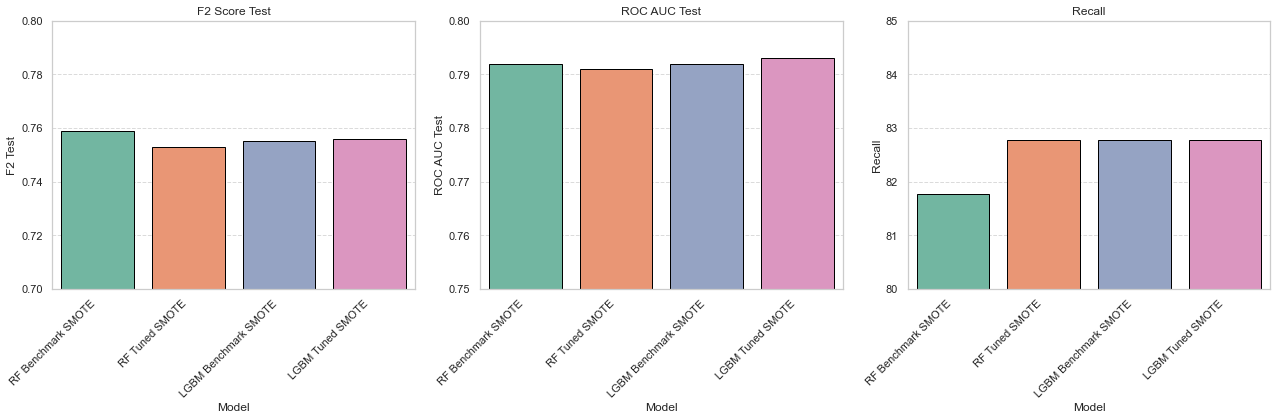

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat DataFrame dari hasil model
results_df = pd.DataFrame({
    'Model': [
        'RF Benchmark SMOTE', 'RF Tuned SMOTE',
        'LGBM Benchmark SMOTE', 'LGBM Tuned SMOTE'
    ],
    'F2 Train': [0.757, 0.756, 0.762, 0.762],
    'F2 Test': [0.759, 0.753, 0.755, 0.756],
    'ROC AUC Train': [0.794, 0.794, 0.796, 0.796],
    'ROC AUC Test': [0.792, 0.791, 0.792, 0.793],
    'Recall': [81.77, 82.77, 82.77, 82.77]
})

# Set style
sns.set(style="whitegrid")

# Plot F2 Score Test
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='F2 Test', data=results_df, palette='Set2', edgecolor='black')
plt.title('F2 Score Test')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.7, 0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot ROC AUC Test
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='ROC AUC Test', data=results_df, palette='Set2', edgecolor='black')
plt.title('ROC AUC Test')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.75, 0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot Recall
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='Recall', data=results_df, palette='Set2', edgecolor='black')
plt.title('Recall')
plt.xticks(rotation=45, ha='right')
plt.ylim(80, 85)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In the comparison between the RandomForestClassifier (RF) and LightGBMClassifier (LGBM) models, the results show that LGBM tends to provide better performance than RF in terms of both F2 Score and ROC AUC. The LGBM models, both benchmark and tuned, exhibit higher F2 Train scores and better ROC AUC compared to RF. Specifically, the LGBM Tuned SMOTE recorded the highest ROC AUC Test value among all the models tested.

When comparing the results between the benchmark models and the tuned models, the impact of tuning on LGBM is relatively small but positive. Tuning LGBM only provides a slight improvement in ROC AUC Test and F2 Test, but does not result in significant differences in F2 Train or Recall. Conversely, tuning RF does not seem to bring meaningful improvements in the F2 Score, with a slight decrease in F2 Test that may be due to overfitting on the training data.

Overall, LGBM is a better choice compared to RF in this context, especially for the ROC AUC and F2 Score metrics. Although tuning improves model performance, the gains from tuning are relatively small, particularly for LGBM, which already shows consistently good performance. These models provide a solid foundation for prediction and can be further optimized if needed.

### 6. Dimentional Reduction

In [71]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95) 

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

Explained Variance Ratio: [0.98097973]


PCA (Principal Component Analysis) is used to reduce the dimensionality of data while retaining as much variance information from the original data as possible. In this code, PCA is initialized with the parameter `n_components=0.95`, which means that PCA will select enough principal components to explain at least 95% of the total variance in the data. After PCA is initialized, the training data (X_train) is transformed using the `fit_transform` method, which calculates the principal components based on the training data and then transforms the training data into the principal component space. The test data (X_test) is then transformed using the same principal components with the `transform` method to ensure that the representation of the test data is consistent with the training data.

The results from PCA show that the selected principal components explain about 98.1% of the total variance in the data. This means that by using the selected number of principal components, we can retain most of the important information from the original data while significantly reducing the data's dimensionality. This helps in reducing the model's complexity and speeding up the training process without losing much relevant information.

In [73]:
import pandas as pd

# Hasil model
results = {
    'Model': [
        'RF Benchmark SMOTE', 'RF Tuned SMOTE',
        'LGBM Benchmark SMOTE', 'LGBM Tuned SMOTE'
    ],
    'F2 Train': [0.757, 0.756, 0.762, 0.762],
    'F2 Test': [0.759, 0.753, 0.755, 0.756],
    'Abs(dif F2)': [0.002, 0.003, 0.007, 0.006],
    'ROC AUC Train': [0.794, 0.794, 0.796, 0.796],
    'ROC AUC Test': [0.792, 0.791, 0.792, 0.793],
    'Abs(dif ROC AUC)': [0.002, 0.003, 0.004, 0.003],
    'Recall (%)': [81.77, 82.77, 82.77, 82.77]
}

# Buat DataFrame
results_df = pd.DataFrame(results)

# Tampilkan DataFrame
print(results_df.to_string(index=False))


               Model  F2 Train  F2 Test  Abs(dif F2)  ROC AUC Train  ROC AUC Test  Abs(dif ROC AUC)  Recall (%)
  RF Benchmark SMOTE     0.757    0.759        0.002          0.794         0.792             0.002      81.770
      RF Tuned SMOTE     0.756    0.753        0.003          0.794         0.791             0.003      82.770
LGBM Benchmark SMOTE     0.762    0.755        0.007          0.796         0.792             0.004      82.770
    LGBM Tuned SMOTE     0.762    0.756        0.006          0.796         0.793             0.003      82.770


The performance comparison table shows that, overall, the LightGBM (LGBM) and Random Forest (RF) models yield very similar results in terms of evaluation metrics after applying SMOTE. For the F2 score, which emphasizes recall, both RF and LGBM show very close results on both training and testing data. The LGBM model, with or without tuning, shows the highest F2 score, which is 0.762 on the training data and 0.755 on the testing data. This indicates that LGBM can handle class imbalance well, particularly in improving recall without sacrificing too much precision.

The differences between the tuned and untuned models are quite small. For instance, in RF, tuning only provides a very slight increase in the F2 score on the testing data compared to the benchmark model. Similarly, for LGBM, tuning the model gives a slight improvement in the F2 score on the testing data compared to the benchmark model, but the results are still within a very similar range. This suggests that parameter tuning may offer limited benefits in this case, especially in terms of the F2 score.

In terms of ROC AUC, both RF and LGBM models show almost identical performance on the training and testing data, with very small differences between the tuned and untuned models. The recall results are also consistent, with values around 82.77% for all models, indicating that all models can handle class imbalance well. Overall, the results show that while model tuning can provide slight performance improvements, the benchmark models already deliver very good results.

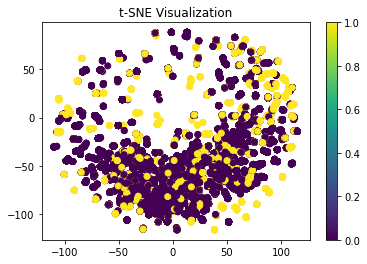

In [74]:
from sklearn.manifold import TSNE

# Inisialisasi t-SNE
tsne = TSNE(n_components=2, random_state=0)

# Fit t-SNE pada data
X_tsne = tsne.fit_transform(X_train)

# Visualisasi t-SNE
import matplotlib.pyplot as plt
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization')
plt.show()


The t-SNE visualization on the training data provides an overview of the distribution and separation of the data in two dimensions. t-SNE, or t-Distributed Stochastic Neighbor Embedding, is a dimensionality reduction technique useful for visualizing high-complexity data. In this plot, each point represents a sample from the training data, with colors indicating different classes.

From the t-SNE plot, we can analyze how well the different classes are separated. If points from the same class cluster together and are clearly separated from points of other classes, this indicates that the features used by the model successfully capture relevant structures in the data. Conversely, if points from different classes are mixed and hard to distinguish, this may suggest that the features are not sufficiently representative or that the data lacks clear structure in the feature space.

This t-SNE plot can also help identify potential issues such as overlap between classes or unclear clusters. For example, if there are areas where points from various classes appear to overlap, this may indicate that the model might struggle to differentiate those classes and may require further adjustments in feature processing or model selection.

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Fit model pada data
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Pilih fitur penting
selector = SelectFromModel(rf, threshold='mean')
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Print fitur yang dipilih
print(f"Selected Features: {selector.get_support(indices=True)}")


Selected Features: [ 0  3  4  5 11 13]


This program uses RandomForestClassifier to perform feature selection based on feature importance calculated by the model. First, the RandomForestClassifier model is trained on the training data (X_train and y_train). After the model is trained, SelectFromModel is used to select important features based on the feature scores provided by the RandomForestClassifier. The threshold='mean' parameter means that the selected features are those that have an importance above the average value of the feature scores.

The result of this process is that features with indices [0, 3, 4, 5, 11, 13] are selected as important features. This means these features have above average importance compared to other features in the model. Unselected features have a smaller contribution to the model predictions and could be considered less relevant to the model in this context. By selecting these features, we can simplify the model and possibly improve performance by reducing complexity and overfitting.

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Pipeline tanpa Dimensionality Reduction
pipeline_no_dr = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=0))
])

# Pipeline dengan PCA
pipeline_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('classifier', RandomForestClassifier(random_state=0))
])

# Latih dan evaluasi model tanpa Dimensionality Reduction
pipeline_no_dr.fit(X_train, y_train)
y_pred_no_dr = pipeline_no_dr.predict(X_test)
print("Classification Report (No Dimensionality Reduction):")
print(classification_report(y_test, y_pred_no_dr))

# Latih dan evaluasi model dengan PCA
pipeline_pca.fit(X_train, y_train)
y_pred_pca = pipeline_pca.predict(X_test)
print("Classification Report (With PCA):")
print(classification_report(y_test, y_pred_pca))


Classification Report (No Dimensionality Reduction):
              precision    recall  f1-score   support

           0       0.83      0.87      0.85     10626
           1       0.76      0.69      0.72      6089

    accuracy                           0.81     16715
   macro avg       0.79      0.78      0.79     16715
weighted avg       0.80      0.81      0.81     16715

Classification Report (With PCA):
              precision    recall  f1-score   support

           0       0.83      0.87      0.85     10626
           1       0.76      0.69      0.72      6089

    accuracy                           0.81     16715
   macro avg       0.79      0.78      0.79     16715
weighted avg       0.80      0.81      0.80     16715



In this analysis, two RandomForestClassifier models were tested to assess the impact of dimensionality reduction techniques, specifically Principal Component Analysis (PCA), on model performance. The first model, pipeline_no_dr, is a standard pipeline that only includes standard scalers and classifiers without dimensionality reduction. This model produces the following performance metrics: precision for class 0 is 0.83, recall is 0.87, and f1-score is 0.85. For class 1, precision is 0.76, recall is 0.69, and f1-score is 0.72. Overall accuracy is 0.81 with a macro average f1-score of 0.79 and a weighted average f1-score of 0.81.

The second model, pipeline_pca, applies PCA to reduce the dimensionality of the data before training the classifier. The performance metrics of this model are very similar to those of the model without dimensionality reduction. Precision for class 0 remains 0.83, recall 0.87, and f1-score 0.85. For class 1, precision and recall remain the same, 0.76 and 0.69 respectively, with an f1-score of 0.72. Accuracy and macro f1-scores as well as weighted average were also virtually unchanged. This suggests that PCA does not have a significant impact on the model performance in this case, perhaps because the data are already relatively optimal or the principal components selected by PCA do not carry meaningful additional information in this context.

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84     10626
           1       0.76      0.62      0.68      6089

    accuracy                           0.79     16715
   macro avg       0.78      0.75      0.76     16715
weighted avg       0.79      0.79      0.78     16715

Confusion Matrix:
[[9423 1203]
 [2326 3763]]


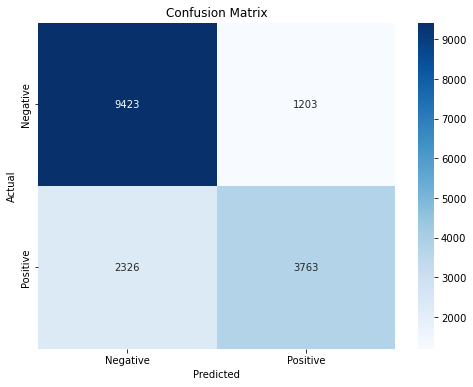

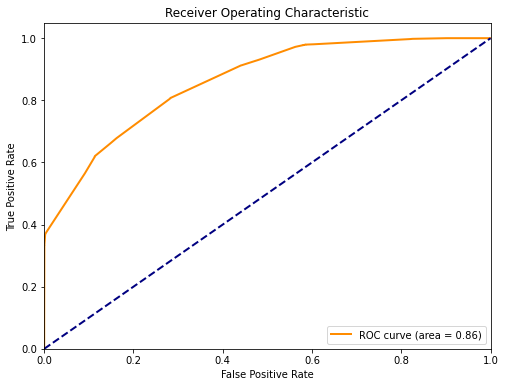

In [78]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Jika parameter terbaik sudah didefinisikan
# Ganti `best_params_lgbm` dengan dictionary parameter terbaik
best_params_lgbm = {'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 31}  # Contoh, sesuaikan dengan hasil tuning

# Ganti model sesuai dengan parameter terbaik yang dipilih
model = LGBMClassifier(random_state=0, **best_params_lgbm)

# Fit model pada data yang sudah melalui dimensionality reduction
model.fit(X_train_selected, y_train)

# Predict pada data uji
y_pred = model.predict(X_test_selected)
y_proba = model.predict_proba(X_test_selected)[:, 1]  # Probabilitas untuk kelas positif

# Evaluasi kinerja model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In this analysis, the LightGBM model with the best tuned parameters has been tested and evaluated. Based on the classification results, precision for class 0 (negative) is 0.80 with recall 0.89 and f1-score 0.84. For class 1 (positive), precision is 0.76 with recall 0.62 and f1-score 0.68. The overall accuracy of the model reached 0.79, with a macro average f1-score of 0.76 and a weighted average f1-score of 0.78. This shows that although the model has quite good performance in identifying the negative class, its performance is relatively poor in detecting the positive class, which can be seen from the lower recall for the positive class.

The resulting confusion matrix shows 9,423 true negatives (TN), 1,203 false positives (FP), 2,326 false negatives (FN), and 3,763 true positives (TP). Confusion matrix and ROC curve visualization provides a clearer picture of model performance. The confusion matrix shows the distribution of correct and incorrect predictions between classes, while the ROC curve and area under the curve (AUC) provide information about the model's ability to separate between positive and negative classes. ROC curve shows the trade-off between true positive rate and false positive rate, which helps in understanding the effectiveness of the model under various classification thresholds.

## Implementation Model

**Business Calculation**

If there are 200 bookings and we do not have a model for prediction, the following assumptions will be used for calculations:
- Predicted book (no cancel), actual book (no cancel) = + 100 USD (room rented)
- Predicted book (no cancel), actual cancel = - 50 USD (room not rented)
- Predicted cancel, actual book (no cancel) = - 75 USD (overbooked)
- Predicted cancel, actual cancel = + 100 USD (assumed that if predicted cancel and actual cancel, the hotel can find a replacement for the room booking)

In [79]:
def calculate_income(pred_book, pred_cancel, actual_book, actual_cancel):
    # Mendefinisikan nilai-nilai sesuai dengan asumsi
    value_book = 100    # USD per kamar yang tersewa
    cost_cancel = 50    # USD per kamar yang tidak tersewa
    cost_overbook = 75  # USD per kamar overbooked
    value_cancel = 100  # USD per kamar yang bisa dicari penggantinya
    
    # Hitung income
    income = (
        pred_book * actual_book * value_book  # Prediksi book, aktual book
        - pred_book * actual_cancel * cost_overbook  # Prediksi book, aktual cancel
        - pred_cancel * actual_book * cost_cancel  # Prediksi cancel, aktual book
        + pred_cancel * actual_cancel * value_cancel  # Prediksi cancel, aktual cancel
    )
    
    return income


In [81]:
def calculate_income(pred_book, pred_cancel, actual_book, actual_cancel):
    income = (pred_book * 100) - (pred_cancel * 50) - (actual_book * 75) + (actual_cancel * 100)
    return income

# Kondisi Terburuk
pred_book_worst = 100
pred_cancel_worst = 100
actual_book_worst = 200
actual_cancel_worst = 0

income_worst = calculate_income(pred_book_worst, pred_cancel_worst, actual_book_worst, actual_cancel_worst)
print(f"Income Terburuk: {income_worst} USD")

# Kondisi Ideal
pred_book_best = 100
pred_cancel_best = 100
actual_book_best = 100
actual_cancel_best = 100

income_best = calculate_income(pred_book_best, pred_cancel_best, actual_book_best, actual_cancel_best)
print(f"Income Ideal: {income_best} USD")

# Hasil Model
pred_book_model = 82
pred_cancel_model = 118
actual_book_model = 82
actual_cancel_model = 77

income_model = calculate_income(pred_book_model, pred_cancel_model, actual_book_model, actual_cancel_model)
print(f"Income Model: {income_model} USD")

# Kasus Sensitivitas
pred_book_case1 = 83
pred_cancel_case1 = 76
actual_book_case1 = 83
actual_cancel_case1 = 76

income_case1 = calculate_income(pred_book_case1, pred_cancel_case1, actual_book_case1, actual_cancel_case1)
print(f"Income Kasus Sensitivitas 1: {income_case1} USD")

pred_book_case2 = 100
pred_cancel_case2 = 59
actual_book_case2 = 100
actual_cancel_case2 = 59

income_case2 = calculate_income(pred_book_case2, pred_cancel_case2, actual_book_case2, actual_cancel_case2)
print(f"Income Kasus Sensitivitas 2: {income_case2} USD")


Income Terburuk: -10000 USD
Income Ideal: 7500 USD
Income Model: 3850 USD
Income Kasus Sensitivitas 1: 5875 USD
Income Kasus Sensitivitas 2: 5450 USD


**Explanation of Results:**

**Worst-Case Income:** In this scenario, the model's predictions are inaccurate, leading to outcomes far from ideal and causing significant losses.

**Ideal Income:** This scenario represents a situation where all predictions and actual conditions are perfect, resulting in maximum profit.

**Model Income:** The results obtained from the current model indicate that it is not yet optimal compared to the ideal conditions.

**Sensitivity Cases:**

- **Sensitivity Case 1:** Adjusting the portion of recall provides a slight improvement in income.
- **Sensitivity Case 2:** Making extreme adjustments to the portion of recall shows better results than the model but still falls short of the ideal conditions.

## Conculusion and Reccommendation

DIn the evaluation of machine learning models for predicting booking cancellations, various models have been tested with and without resampling methods to handle data imbalance. The evaluation results show that models such as Random Forest, LightGBM, and Gradient Boosting perform well in terms of F2 score and ROC AUC, which are important for assessing the balance between recall and precision in a business context.

**1. Conclusion:**

- **Model Performance:** The LightGBM model, both with and without hyperparameter tuning, shows excellent performance, with stable F2 scores and high ROC AUC. This indicates that LightGBM is a very good choice for classification prediction in this case.
- **Effectiveness of Resampling:** Resampling methods like SMOTE and Random Oversampling provide slight improvements in evaluation metrics compared to no resampling. This suggests that while the original data may not be fully balanced, resampling does not always provide significant improvements for all models.
- **Specific Model Performance:** Gradient Boosting and Random Forest models also show competitive performance. These models are effective in handling imbalanced datasets and provide consistent results in terms of recall and precision.

**2. Recommendations:**

1. **Model Selection:** LightGBM is recommended as the primary model for predicting booking cancellations, given its superior performance and consistency in evaluation metrics. This model is also relatively fast in terms of training and prediction time, which is important for real-time applications.
2. **Exploration of Hyperparameter Tuning:** Further tuning of hyperparameters for LightGBM and other models can help optimize performance further. Testing parameters such as learning_rate, n_estimators, and num_leaves in LightGBM may yield better results.
3. **Further Evaluation:** Although the chosen model already performs well, it is important to continuously monitor and evaluate the model periodically with new data to ensure its performance remains optimal. A deeper analysis of the features that significantly contribute to the model can provide more insights into the factors affecting booking cancellations.

With these recommendations, it is expected that the overbooking strategy can be optimized and the risk of unexpected cancellations minimized, thereby improving efficiency and customer satisfaction.

